<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[7차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ HSV 색상공간을 이해하고 원하는 색상을 추출하는 방법을 학습한다.<br><br>
○ 크로마 키(Chroma key) 합성으로 이미지를 합성하는 방법을 학습한다.<br><br> 
○ 이미지 필터링 방법에 대해 학습한다.<br><br>
○ 모폴로지 연산 방법에 대해 학습한다.      
        </font></td></tr>   
</table>

# 색상공간 (Color Space) 이해하기

- RGB : Red, Green, Blue로 구성된 색상공간 - PC의 모니터에 주로 사용
  - 가산혼합 : 색을 섞을수록 명도가 높아지는 혼합
<img src="./lecture_image/07_color_space2.png" width=40%>


- CMYK : Cyan, Magenta, Yellow, Black으로 구성된 색상공간 - 인쇄용으로 주로 사용
  - 감산혼합 : 색을 섞을수록 명도가 낮아지는 혼합
<img src="./lecture_image/07_color_space3.png" width=40%>  


- HSV : Hue(색상), Saturation(채도), Value(명도)로 변환한 색상공간 
  - 직관적으로 색상 파악이 용이

<img src="./lecture_image/07_color_space.png" width=50%>

- YUV : Y (밝기, 휘도), U, V (색상)을 이용해서 색상을 표현하는 색상공간
  - U축 : 파란색에서 밝기 성분을 뺀 값 (U = B - Y)
  - V축 : 빨간색에서 밝기 성분을 뺀 값 (V = R - Y)
  - 아날로그 컬러신호 변환에 주로 사용
  - TV나 비디오카메라에 주로 사용
  
  
- YCbCr : Y (밝기, 휘도), Cb (청색 크로마 성분), Cr (적색 크로마 성분)을 이용해서 색상을 표현하는 색상공간
   - YUV와 유사한 형태로 RGB 색공간과는 다르게 별도의 명암을 구분하는 U(Cb), V(Cr) 사용
   - 디지털 텔레비전, 비디오, 디지털 사진에서 사용하는 색공간
   
<img src="./lecture_image/07_color_space4.png" width=20%>   


- CIE : 인간의 색채 인지에 대한 연구와 측정을 바탕으로 수학적으로 정의된 색상 공간
  - XYZ : 적색(X), 녹색(Y), 청색(Z) 계열의 반응정도값을 적용 
  - Lab : 색오차와 근소한 색차이를 표현하기 위해 변환된 색상 공간
  - Luv : 지각적 분균등성을 해소한 균등 색상 공간 (3차원 직교좌표를 이용하는 색상 공간)
  
<img src="./lecture_image/07_color_space5.png" width=30%>    

- HSV 색상공간의 구성
 
 <img src="./lecture_image/07_hsv.png" width=70%>


- 색상 값 
  - Hue 값은 0-179 범위로 설정
  - 만약 Hue 값을 -로 설정하면 뒤쪽부터 인덱싱됨

<img src="./lecture_image/07_hsv2.png" width=50%>

<table style="border-collapse: collapse; width: 100%; height: 140px;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr style="height: 20px;">
<td style="width: 13.6047%; text-align: center; height: 20px;"><b>명칭</b></td>
<td style="width: 11.5115%; text-align: center; height: 20px;"><b>값의 범위</b></td>
<td style="width: 49.8837%; text-align: center; height: 20px;"><b>참고</b></td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>색상(H)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 180</td>
<td style="width: 49.8837%; height: 40px;">원래 0~360범위이지만 OpenCV에서는 1/2 범위이다</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>채도(S)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 하얀색, 255에 가까울수록 H의 색상이 된다.</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>명도(V)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 검은색, 255에 가까울수록 &nbsp;H의 색상이 된다.</td>
</tr>
</tbody>

## 색상추적

(-0.5, 260.5, 192.5, -0.5)

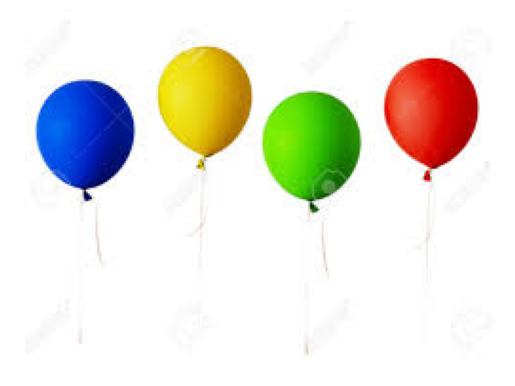

In [3]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/balloon.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

(-0.5, 260.5, 192.5, -0.5)

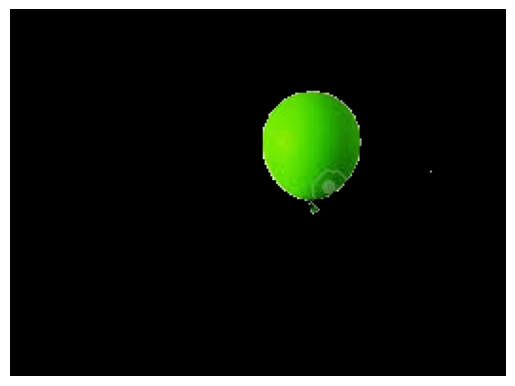

In [22]:
#실습
# 색상 , 채도, 명도
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 찾고자 하는 색상을 HSV 색상공간에 정의(마스킹)
# 색상 , 채도, 명도 최소값, 색상, 채도, 명도 최대값
mask = cv2.inRange(hsv,(40,40,40),(70,255,255))

# hsv에서 정의한 색상이 이미지도 있으면 잘라냄
img2 = cv2.bitwise_and(img,img,mask=mask)

plt.imshow(img2)
plt.axis("off")
#초록색
#mask = cv2.inRange(hsv, (40, 40, 40), (70, 255, 255))
#파란색 lower_blue = np.array([110,50,50])
#upper_blue = np.array([130,255,255])
#노란색 mask = cv2.inRange(hsv,(20, 50, 50),(40, 255, 255))

(-0.5, 260.5, 192.5, -0.5)

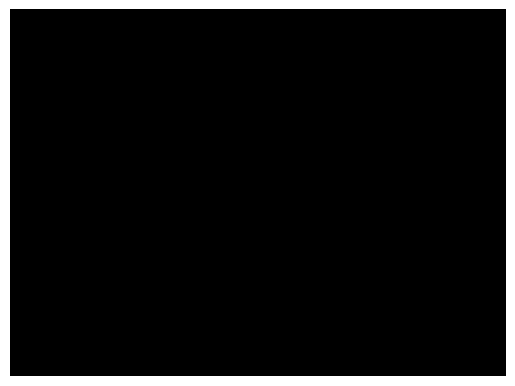

In [15]:
#실습
# 색상 , 채도, 명도
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 찾고자 하는 색상을 HSV 색상공간에 정의(마스킹)
# 색상 , 채도, 명도 최소값, 색상, 채도, 명도 최대값
mask = cv2.inRange(hsv,(0,100,100),(10,255,10))

# hsv에서 정의한 색상이 이미지도 있으면 잘라냄
img2 = cv2.bitwise_and(img,img,mask=mask)

plt.imshow(img2)
plt.axis("off")

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 이미지에서 원하는 색상을 추출해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/07_extract_color.png" width=60%></td></tr>   
</table>

## 크로마 키(Chroma key) 합성 

- 녹색 또는 파란색 배경에서 촬영한 영상에 다른 배경 영상을 합성하는 기술

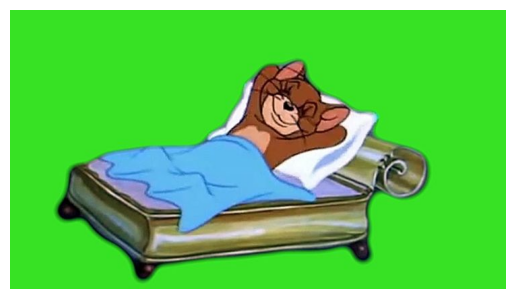

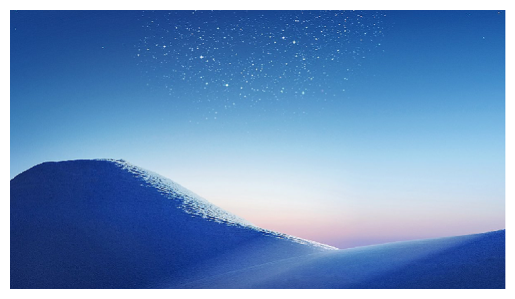

In [25]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/chromakey2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
back = cv2.imread("images/back2.png")
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()
plt.imshow(back)
plt.axis("off")
plt.show()

(-0.5, 735.5, 413.5, -0.5)

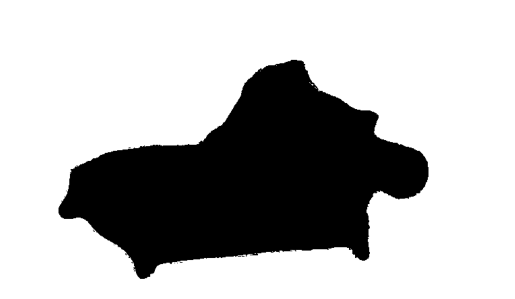

In [27]:
#실습
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 녹색 범위 설정
mask = cv2.inRange(hsv, (50,180,50), (70,255,255))

plt.imshow(mask, cmap="gray")
plt.axis("off")

(-0.5, 735.5, 413.5, -0.5)

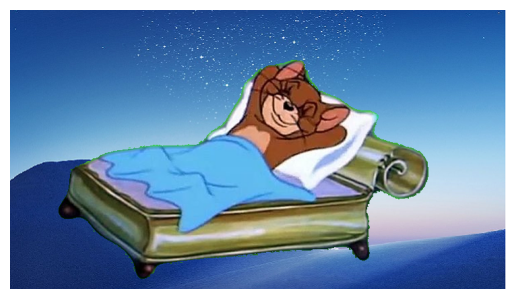

In [28]:
#실습
# mask와 img 을 and 연산한 후에 back(배경)에 복사 -> img에 할당
# back, mask, img 는 동일한 크기여야함
# opencv3 에서는 지원하지 않음
cv2.copyTo(back, mask, img)

plt.imshow(img)
plt.axis("off")

# 이미지 연산


## 이미지 필터링 - blur

- <font color=red>cv2.filter2D(img, -1, kernel)</font>
  - 이미지와 필터를 컨볼루션 연산 수행
  - 2번째 파라미터는 색의 깊이 (몇 비트)로 -1이면 원본 이미지와 동일
  - kernel : 적용할 2차원 필터
  
 <img src="./lecture_image/07_filter2d.png" width=60%></td></tr>    

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


<function matplotlib.pyplot.show(close=None, block=None)>

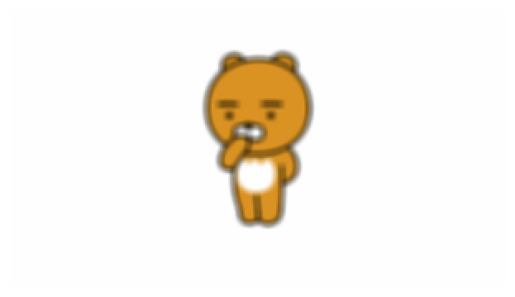

In [34]:
#실습
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/chareactor.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 필터설정
kernel = np.ones((5,5),np.float32)/25 # 모든 값이 0.04로 변환
print(kernel)

result = cv2.filter2D(img, -1,kernel)

plt.imshow(img)
plt.axis("off")
plt.show
plt.imshow(result)
plt.axis("off")
plt.show

## 모폴로지 - 침식과 팽창 

- Morphology : 영상의 형태학적 측면을 다루는 기법으로 전처리 등에 사용


- Erosion (침식) : 이미지의 경계부분을 배경 픽셀로 변경하는 작업 (1이 0으로 변경)
- Dilation (팽창) : 이미지의 배경부분을 전경 픽셀로 변경하는 작업 (0이 1로 변경)
  - iterations = 1 : 반복 적용 회수 (회수가 많아지면 침식과 팽창의 효과가 커짐)
  
 <img src="./lecture_image/07_mophology.png" width=60%></td></tr>    

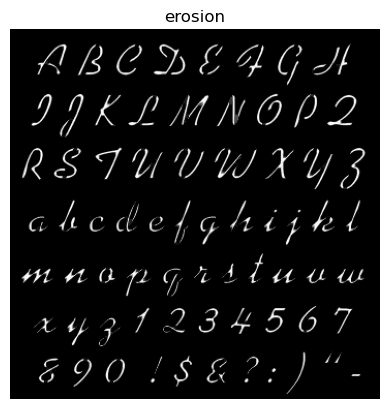

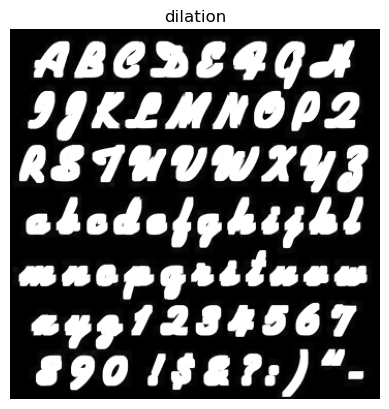

In [44]:
#실습
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/number.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.axis("off")

# 침식 및 팽창의 크기 설정(필터, 커널)
# np.uint8 : u(unsigned : 양수), int(정수), 8(8비트, 0~255 사이 값)
kernel = np.ones((3,3),np.uint8)

# 침식
# iterations : 몇 번 수행 할 것인가
ret_e = cv2.erode(img, kernel, iterations = 1)

plt.imshow(ret_e, cmap="gray")
plt.title("erosion")
plt.axis("off")
plt.show()

# 팽창
ret_d = cv2.dilate(img, kernel, iterations = 2)

plt.imshow(ret_d, cmap="gray")
plt.title("dilation")
plt.axis("off")
plt.show()

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 열림과 팽창 연산을 수행해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/07_mophology1.png" width=60%></td></tr>   
</table>

## Opening과 Closing

- Opening : erosion 수행 후에 바로 dilate을 수행하여 원래 이미지 크기로 돌려 놓는 것

<img src="./lecture_image/07_mophology3.png" width=40%>


- Closing : dilate 수행 후에 바로 erosion을 수행하여 원래 이미지 크기로 돌려 놓는 것

<img src="./lecture_image/07_mophology4.png" width=40%>  

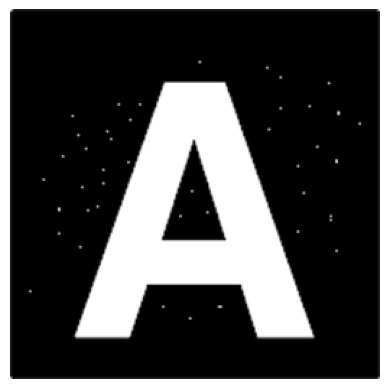

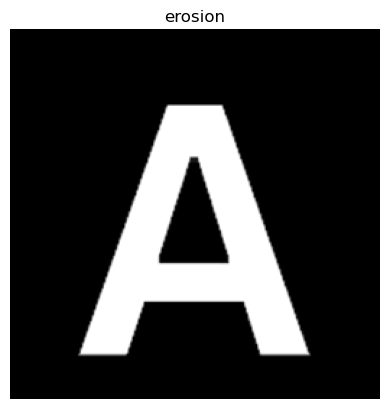

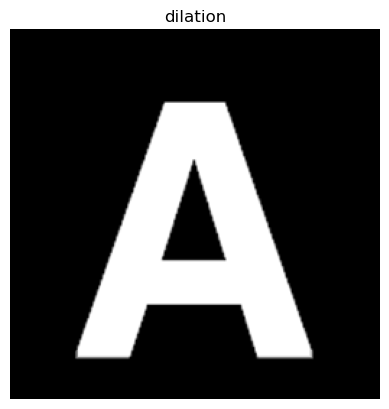

In [48]:
#실습
# opennin
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/noise_A.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

# 침식
# iterations : 몇 번 수행 할 것인가
ret_e = cv2.erode(img, kernel, iterations = 2)

plt.imshow(ret_e, cmap="gray")
plt.title("erosion")
plt.axis("off")
plt.show()

# 팽창
ret_d = cv2.dilate(ret_e, kernel, iterations = 2)

plt.imshow(ret_d, cmap="gray")
plt.title("dilation")
plt.axis("off")
plt.show()

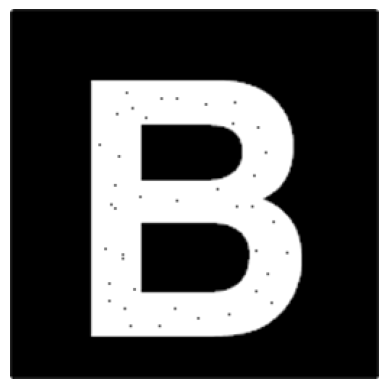

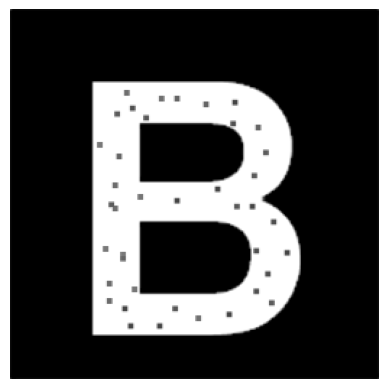

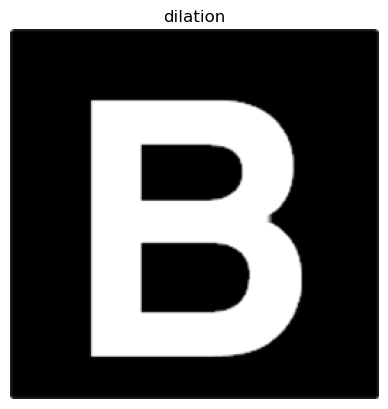

In [54]:
#실습
# opennin
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/noise_B.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

# 침식
# iterations : 몇 번 수행 할 것인가
ret_e = cv2.erode(img, kernel, iterations = 1)

plt.imshow(ret_e, cmap="gray")
plt.axis("off")
plt.show()

# Closing 연산
# cv2,MORPH_CLOSE(닫힘) ,cv2,MORPH_OPEN(열림)
result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.imshow(result, cmap="gray")
plt.title("dilation")
plt.axis("off")
plt.show()

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 모폴로지 연산을 이용하여 이미지를 필터링 해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/07_mophology5.png" width=80%></td></tr>   
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[7차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>

○ 색상공간의 종류 : RGB, CYMK, HSV, YUV, YCbCr, CIE 등
        
○ HSV 색공간  : H(색상), S(채도), V(명도)
        
        
○ 크로마 키 합성 : 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술<br>

○ copyTo() : 녹색 영역에 다른 영역 배경을 합성하기   
        

○ <font color=red>cv2.filter2D(img, -1, kernel)</font> : 이미지와 필터를 컨볼루션 연산 수행

○ 모폴로지 연산 : 영상의 형태학적 측면을 다루는 기법으로 전처리 등에 사용
        
- Erosion (침식) : 이미지의 경계부분을 배경 픽셀로 변경하는 작업 (1이 0으로 변경)        
- Dilation (팽창) : 이미지의 배경부분을 전경 픽셀로 변경하는 작업 (0이 1로 변경)        
- Opening : erosion 수행 후에 바로 dilate을 수행하여 원래 이미지 크기로 돌려 놓는 것        
- Closing : dilate 수행 후에 바로 erosion을 수행하여 원래 이미지 크기로 돌려 놓는 것          
       
</font></td></tr>   
</table>
